**This notebook was created using Google Colab**

Notebook I used to make changes to: https://github.com/trekhleb/machine-learning-experiments/blob/master/experiments/digits_recognition_mlp/digits_recognition_mlp.ipynb



# Business Understanding

**Objective:** To build and evaluate a convolutional neural network (CNN) model for image classification using the CIFAR-10 dataset.

**Success Criteria:**
1. Achieve a high accuracy rate on the test set, indicating that the CNN model effectively learns to classify images.
2. Evaluate the model's performance across different parameters, such as batch size, learning rate, and number of epochs.
3. Visualize the training and validation loss/accuracy curves to understand model convergence and potential overfitting.


# Data Understanding

**Data Collection:** The CIFAR-10 dataset was imported from the TensorFlow Keras dataset library.

**Data Description:**
- Each image in the CIFAR-10 dataset has a resolution of 32x32 pixels.
- Images are represented in RGB format, with each pixel having values ranging from 0 to 255 for each color channel.

**Data Exploration:**
- Visualize sample images from the dataset to understand the characteristics of the images.
- Explore label distribution to ensure that classes are balanced.

# Data Preparation

**Data Cleaning:** No cleaning was needed for the CIFAR-10 dataset.

**Data Preprocessing:**
- Normalize pixel values to a range of [0, 1].
- Reshape images to have a shape of (32, 32, 3) to match the input shape expected by the CNN model.

# Modelling

**Convolutional Neural Network (CNN):**
- Implemented a CNN model using TensorFlow Keras.
- Experimented with different CNN architectures, including varying numbers of convolutional layers, pooling layers, and fully connected layers.



# Evaluation

**Model Performance:**
- Evaluated the CNN model's performance on both the training and validation datasets.
- Monitored metrics such as loss and accuracy during training to assess model convergence and potential overfitting.
- Visualized training and validation loss/accuracy curves to understand the model's learning dynamics.
- Conducted error analysis to identify misclassified images and potential areas for improvement.

# Changes Made To Notebook

In [144]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [145]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
import keras

print(keras.__version__)


Python version: 3.10.12
Tensorflow version: 2.15.0
2.15.0


In [146]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [147]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()




In [148]:
# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0


In [149]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)


Since CIFAR-10 consists of color images, the IMAGE_CHANNELS constant should be set to 3 (for red, green, and blue channels)


In [150]:
# Save image parameters to the constants that we will use later for data re-shaping and for model training.
(_, IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS) = x_train.shape

print('IMAGE_WIDTH:', IMAGE_WIDTH)
print('IMAGE_HEIGHT:', IMAGE_HEIGHT)
print('IMAGE_CHANNELS:', IMAGE_CHANNELS)


IMAGE_WIDTH: 32
IMAGE_HEIGHT: 32
IMAGE_CHANNELS: 3


 had to use matplotlib.pyplot.imshow() instead of pd.DataFrame() to visualize the image because imshow() is designed to display images, while DataFrame() is intended for tabular data.

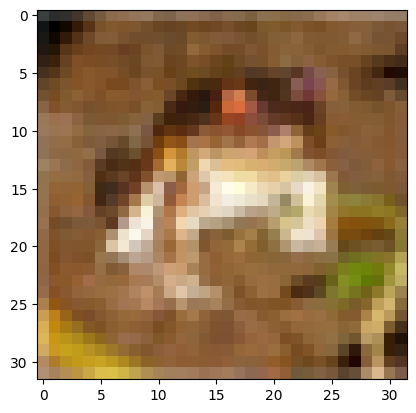

In [151]:
# Visualize the first image in x_train
plt.imshow(x_train[0])
plt.show()

The resolution is pixelated due to CIFAR-10 images having 32x32 pixels

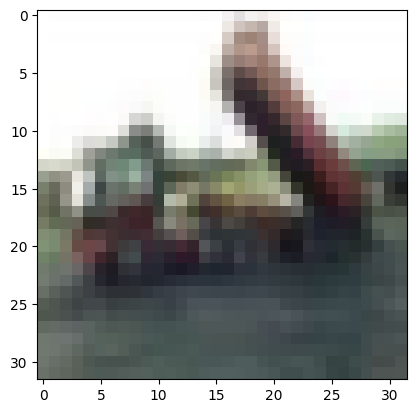

In [152]:
plt.imshow(x_train[2], interpolation='none')
plt.show()


I updatde the code to work with CIFAR-10 instead of MNIST for visualisation. I  replaced x_train[i] and y_train[i] with x_train[i] and y_train[i][0] since y_train in CIFAR-10 is a 2D array where each label is stored as a single-element array


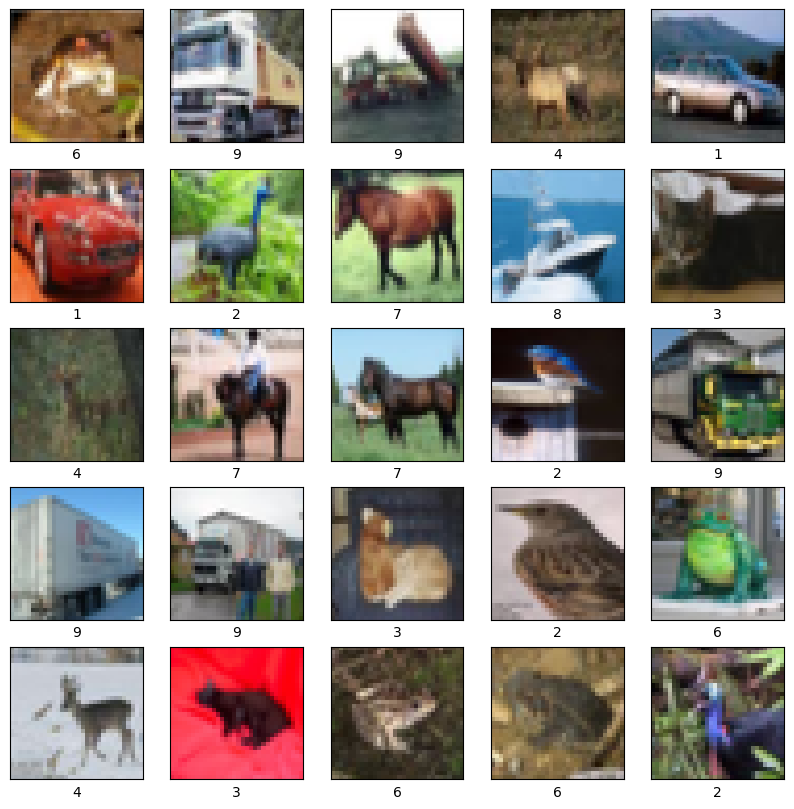

In [153]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10, 10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i][0])  # Use y_train[i][0] to access the label
plt.show()


 modified the IMAGE_CHANNELS constant to be 3 since CIFAR 10 images have three colour channels (RGB)


In [154]:
# Define image parameters
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_CHANNELS = 3  # Update to 3 for RGB channels

# Reshape training and testing data with channels
x_train_with_channels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_channels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)


In [155]:
print('x_train_with_channels:', x_train_with_channels.shape)
print('x_test_with_channels:', x_test_with_channels.shape)


x_train_with_channels: (50000, 32, 32, 3)
x_test_with_channels: (10000, 32, 32, 3)


In [156]:
x_train_normalized = x_train_with_channels / 255.0
x_test_normalized = x_test_with_channels / 255.0


In [157]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][18]

array([[0.00233756, 0.00175317, 0.0012303 ],
       [0.00179931, 0.0011534 , 0.00056901],
       [0.00175317, 0.0012303 , 0.00073818],
       [0.00189158, 0.00138408, 0.00087659],
       [0.00193772, 0.00139946, 0.00086121],
       [0.0018762 , 0.00127643, 0.00073818],
       [0.00143022, 0.00089196, 0.00049212],
       [0.00275279, 0.00236832, 0.00212226],
       [0.00366013, 0.00347559, 0.00326028],
       [0.00381392, 0.00373702, 0.00352172],
       [0.00261438, 0.00206075, 0.00159938],
       [0.00284506, 0.00202999, 0.00135333],
       [0.00370627, 0.00329104, 0.00272203],
       [0.0035371 , 0.00335256, 0.00299885],
       [0.00287582, 0.002599  , 0.00218378],
       [0.00276817, 0.00246059, 0.00201461],
       [0.00255286, 0.00224529, 0.00176855],
       [0.00224529, 0.00183007, 0.00130719],
       [0.00229143, 0.00178393, 0.00121492],
       [0.00241446, 0.00190696, 0.00127643],
       [0.00282968, 0.00241446, 0.00169166],
       [0.0033218 , 0.00299885, 0.0021684 ],
       [0.

In [158]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [159]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 8)         608       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 10, 10, 16)        3216      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 400)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

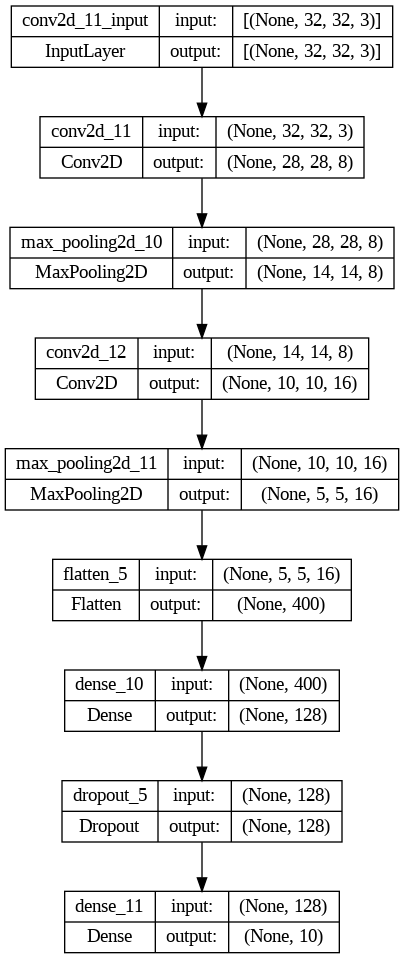

In [160]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [161]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [162]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1563/1563 [==============================] - 44s 27ms/step - loss: 2.3028 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 38s 25ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 2.3028 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 2.3028 - accuracy: 0.0967 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 2.3028 - accuracy: 0.0968 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 38s 25ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 -

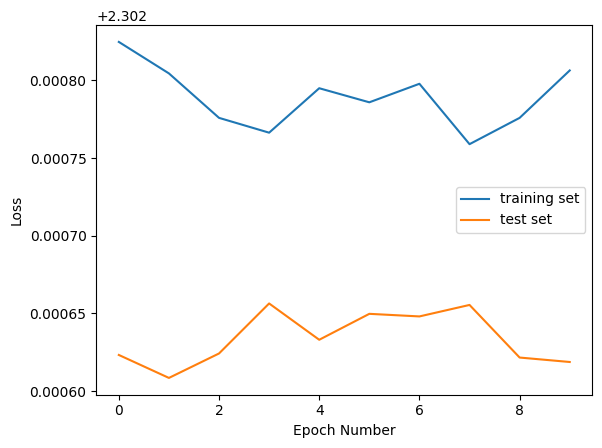

In [163]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

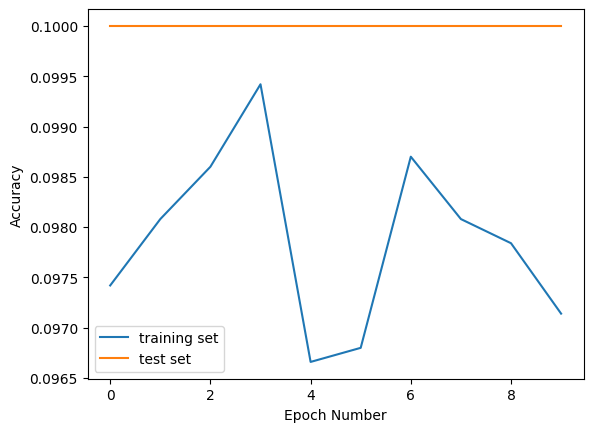

In [164]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

In [165]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [166]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  2.302618980407715
Training accuracy:  0.10000000149011612


In [167]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [168]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)


Validation loss:  2.3026187419891357
Validation accuracy:  0.10000000149011612


In [171]:

predictions_one_hot = loaded_model.predict(x_test_normalized)

# Extract predicted labels for all images
predictions = np.argmax(predictions_one_hot, axis=1)

# Display the predicted labels for the first 10 images
for i in range(10):
    print("Predicted label for image", i+1, ":", predictions[i])


actual_labels = y_test[:10]  # Extract actual labels for the first 10 images

# Compare predictions with actual labels
for i in range(10):
    if actual_labels[i] == predictions[i]:
        print("Prediction for image", i+1, "is correct!")
    else:
        print("Prediction for image", i+1, "is incorrect.")


313/313 [==============================] - 3s 8ms/step
Predicted label for image 1 : 3
Predicted label for image 2 : 8
Predicted label for image 3 : 8
Predicted label for image 4 : 8
Predicted label for image 5 : 6
Predicted label for image 6 : 6
Predicted label for image 7 : 3
Predicted label for image 8 : 6
Predicted label for image 9 : 2
Predicted label for image 10 : 1
Prediction for image 1 is correct!
Prediction for image 2 is correct!
Prediction for image 3 is correct!
Prediction for image 4 is incorrect.
Prediction for image 5 is correct!
Prediction for image 6 is correct!
Prediction for image 7 is incorrect.
Prediction for image 8 is correct!
Prediction for image 9 is incorrect.
Prediction for image 10 is correct!
